In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame

In [74]:
header_names=['Risk Level','Annual Income','Balance','Card type','Gender','Qualification','Martial Status','Years of Employment','Defaulted Credit','Existing','Dependents','Installment plans','Property Status','Duration of credit','Limit','Status']
# Load dataset
data=pd.read_csv('crx.data',names=header_names)

In [75]:
# Inspect data
data.head()

,Risk Level,Annual Income,Balance,Card type,Gender,Qualification,Martial Status,Years of Employment,Defaulted Credit,Existing,Dependents,Installment plans,Property Status,Duration of credit,Limit,Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [76]:
# dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Risk Level           690 non-null    object 
 1   Annual Income        690 non-null    object 
 2   Balance              690 non-null    float64
 3   Card type            690 non-null    object 
 4   Gender               690 non-null    object 
 5   Qualification        690 non-null    object 
 6   Martial Status       690 non-null    object 
 7   Years of Employment  690 non-null    float64
 8   Defaulted Credit     690 non-null    object 
 9   Existing             690 non-null    object 
 10  Dependents           690 non-null    int64  
 11  Installment plans    690 non-null    object 
 12  Property Status      690 non-null    object 
 13  Duration of credit   690 non-null    object 
 14  Limit                690 non-null    int64  
 15  Status               690 non-null    obj

In [78]:
# summary statistics
data.describe()

,Balance,Years of Employment,Dependents,Limit
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [79]:
# for each of the categorical columns, lets see the unique values
for i in data.columns:
    #print(i)
    if data[i].dtype==object:
        print(data[i].unique())

['b' 'a' '?']
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.50' 

In [80]:
# To be consistent across the dataset we replace all these missing values denoted by ? with NaN
data = data.replace('?',np.nan)

In [81]:
def fix_missing_mean(df,col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mean 
    data[col] = pd.to_numeric(data[col], errors = 'coerce')
    data[col].fillna(data[col].mean(), inplace = True)    

def fix_missing_ffill(df, col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with the value from the previous row
    '''
    data[col] = data[col].fillna(method='ffill')

In [82]:
fix_missing_ffill(data,'Risk Level')
fix_missing_ffill(data,'Annual Income')
fix_missing_ffill(data,'Card type')
fix_missing_ffill(data,'Gender')
fix_missing_ffill(data,'Qualification')
fix_missing_ffill(data,'Martial Status')
fix_missing_mean(data,'Duration of credit')

In [83]:
#Checking whether there are any null values 
data.isnull().sum()

Risk Level             0
Annual Income          0
Balance                0
Card type              0
Gender                 0
Qualification          0
Martial Status         0
Years of Employment    0
Defaulted Credit       0
Existing               0
Dependents             0
Installment plans      0
Property Status        0
Duration of credit     0
Limit                  0
Status                 0
dtype: int64

In [84]:
# Separate data with two variables
y = data['Status']
x = data.drop(['Status'], axis=1)
# Preview x
x.head()

,Risk Level,Annual Income,Balance,Card type,Gender,Qualification,Martial Status,Years of Employment,Defaulted Credit,Existing,Dependents,Installment plans,Property Status,Duration of credit,Limit
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0


In [85]:
# List of categorical columns
object_cols = ['Risk Level','Annual Income','Balance','Card type','Gender','Qualification','Martial Status','Years of Employment','Defaulted Credit','Existing','Dependents','Installment plans','Property Status','Duration of credit']

# ordinal-encode categorical columns
X = x.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(x[object_cols])

# Preview the ordinal-encoded features
X.head()

,Risk Level,Annual Income,Balance,Card type,Gender,Qualification,Martial Status,Years of Employment,Defaulted Credit,Existing,Dependents,Installment plans,Property Status,Duration of credit,Limit
0,1.0,156.0,0.0,1.0,0.0,12.0,7.0,30.0,1.0,1.0,1.0,0.0,0.0,69.0,0
1,0.0,328.0,93.0,1.0,0.0,10.0,3.0,65.0,1.0,1.0,6.0,0.0,0.0,11.0,560
2,0.0,89.0,16.0,1.0,0.0,10.0,3.0,36.0,1.0,0.0,0.0,0.0,0.0,97.0,824
3,1.0,125.0,46.0,1.0,0.0,12.0,7.0,73.0,1.0,1.0,5.0,1.0,0.0,31.0,3
4,1.0,43.0,109.0,1.0,0.0,12.0,7.0,41.0,1.0,0.0,0.0,0.0,2.0,37.0,0


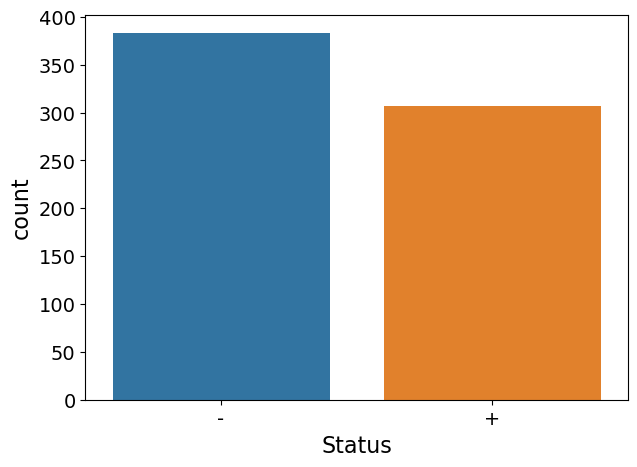

In [113]:
#Let’s visualize the target variable and have a look at how many approved 
# and declined applications are there in our dataset.

fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex=True)
sns.countplot(data=data, x='Status',order=data["Status"].value_counts().index)
total = data['Status'].value_counts().sum()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Status', fontsize=16)
plt.ylabel('count', fontsize=16)

plt.show()

In [87]:
# Using train_test_split, we split X and y dataframes into a training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                               test_size=0.30,
                                               random_state=20)

# Machine Learning Classifiers

In [88]:
#Decision Tree
#We have used sklearn’s DecisionTreeClassifier algorithm to build the model. 
#We find the optimized value of hyperparameter max_depth by varying it between 1 and 10 in steps of 1. 

1 Train score: 0.8612836438923396 Test score: 0.8405797101449275
2 Train score: 0.8612836438923396 Test score: 0.8405797101449275
3 Train score: 0.8861283643892339 Test score: 0.8115942028985508
4 Train score: 0.9089026915113871 Test score: 0.8454106280193237
5 Train score: 0.9296066252587992 Test score: 0.8260869565217391
6 Train score: 0.9461697722567288 Test score: 0.821256038647343
7 Train score: 0.9606625258799172 Test score: 0.7922705314009661
8 Train score: 0.979296066252588 Test score: 0.8067632850241546
9 Train score: 0.9937888198757764 Test score: 0.8067632850241546


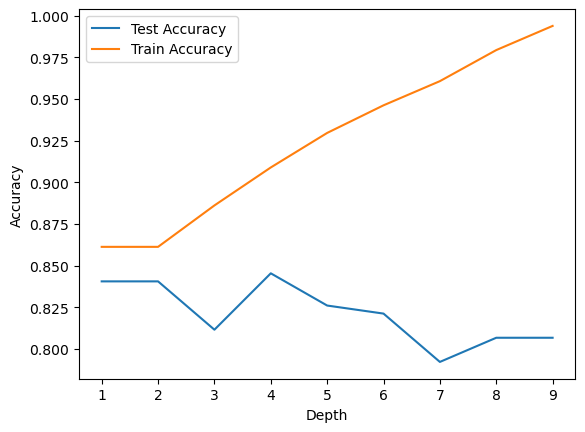

In [89]:
train_acc=[]
test_acc=[]
list_score=[]

for i in range(1, 10):
    
    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)
    dtc.fit(x_train, y_train)

    train_pred = dtc.predict(x_train)

    
    test_pred = dtc.predict(x_test)
   
    test_acc = accuracy_score(y_test, test_pred)
    train_acc = accuracy_score(y_train, train_pred)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_pred, y_train),accuracy_score(test_pred, y_test)]) 
    
    
df2 = DataFrame (list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend() 

In [90]:
train_acc

0.9937888198757764

In [91]:
test_acc

0.8067632850241546

In [92]:
list_score

[[1, 0.8612836438923396, 0.8405797101449275],
 [2, 0.8612836438923396, 0.8405797101449275],
 [3, 0.8861283643892339, 0.8115942028985508],
 [4, 0.9089026915113871, 0.8454106280193237],
 [5, 0.9296066252587992, 0.8260869565217391],
 [6, 0.9461697722567288, 0.821256038647343],
 [7, 0.9606625258799172, 0.7922705314009661],
 [8, 0.979296066252588, 0.8067632850241546],
 [9, 0.9937888198757764, 0.8067632850241546]]

In [105]:
DC=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=5,min_samples_split=7,random_state=2)
DC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=7, random_state=2)

[Text(0.5, 0.875, 'x[8] <= 0.5\nentropy = 0.991\nsamples = 483\nvalue = [215, 268]'),
 Text(0.25, 0.625, 'x[2] <= 2.0\nentropy = 0.3\nsamples = 225\nvalue = [12, 213]'),
 Text(0.125, 0.375, 'x[13] <= 55.0\nentropy = 0.961\nsamples = 13\nvalue = [5, 8]'),
 Text(0.0625, 0.125, 'entropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.1875, 0.125, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.375, 0.375, 'x[13] <= 53.0\nentropy = 0.209\nsamples = 212\nvalue = [7, 205]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 107\nvalue = [0, 107]'),
 Text(0.4375, 0.125, 'entropy = 0.353\nsamples = 105\nvalue = [7, 98]'),
 Text(0.75, 0.625, 'x[14] <= 148.5\nentropy = 0.748\nsamples = 258\nvalue = [203, 55]'),
 Text(0.625, 0.375, 'x[13] <= 39.5\nentropy = 0.943\nsamples = 136\nvalue = [87, 49]'),
 Text(0.5625, 0.125, 'entropy = 0.598\nsamples = 62\nvalue = [53, 9]'),
 Text(0.6875, 0.125, 'entropy = 0.995\nsamples = 74\nvalue = [34, 40]'),
 Text(0.875, 0.375, 'x[7] <= 42.5\nentropy = 0.283\

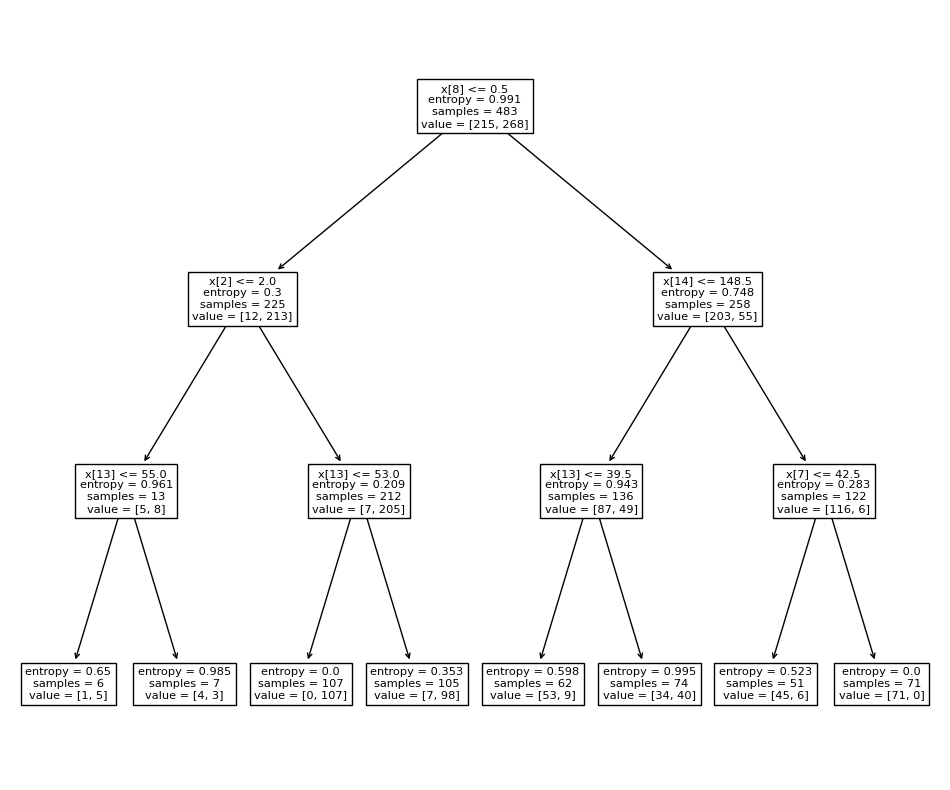

In [106]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(DC.fit(x_train,y_train))

# KNN

Train score: 0.8426501035196687 Test score: 0.6521739130434783
2 Train score: 0.8426501035196687 Test score: 0.6521739130434783
Train score: 0.8385093167701864 Test score: 0.6714975845410628
3 Train score: 0.8385093167701864 Test score: 0.6714975845410628
Train score: 0.8012422360248447 Test score: 0.6570048309178744
4 Train score: 0.8012422360248447 Test score: 0.6570048309178744
Train score: 0.8115942028985508 Test score: 0.6666666666666666
5 Train score: 0.8115942028985508 Test score: 0.6666666666666666
Train score: 0.7929606625258799 Test score: 0.6956521739130435
6 Train score: 0.7929606625258799 Test score: 0.6956521739130435
Train score: 0.7743271221532091 Test score: 0.6859903381642513
7 Train score: 0.7743271221532091 Test score: 0.6859903381642513
Train score: 0.7515527950310559 Test score: 0.6570048309178744
8 Train score: 0.7515527950310559 Test score: 0.6570048309178744
Train score: 0.7536231884057971 Test score: 0.6908212560386473
9 Train score: 0.7536231884057971 Test sc

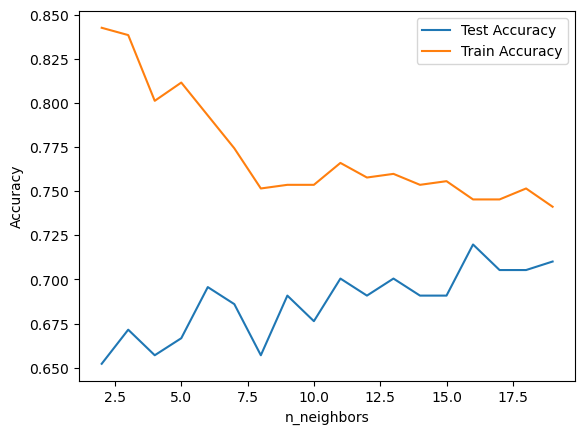

In [95]:
from sklearn.neighbors import KNeighborsClassifier

train_acc=[]
test_acc=[]
list_score=[]

for i in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(x_train,y_train)

    train_predict = knn.predict(x_train)
    test_predict = knn.predict(x_test)

    test_acc = accuracy_score(y_test, test_predict)
    train_acc = accuracy_score(y_train, train_predict)
    print('Train score:',train_acc,'Test score:',test_acc)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_predict, y_train),accuracy_score(test_predict, y_test)]) 
    
    
df3 = DataFrame (list_score,columns=['n_neighbors','Train Accuracy','Test Accuracy'])
plt.plot(df3['n_neighbors'],df3['Test Accuracy'],label='Test Accuracy')
plt.plot(df3['n_neighbors'],df3['Train Accuracy'],label='Train Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend() 

# LOGISTIC REGRESSION

In [96]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledxTrain = scaler.fit_transform(x_train)
rescaledxTest = scaler.fit_transform(x_test)

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression 
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledxTrain, y_train)

LogisticRegression()

In [98]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledxTest)
y_pred1 = logreg.predict(rescaledxTrain)

# Get the accuracy score of logreg model and print it
print("Test: Accuracy = ", logreg.score(rescaledxTest,y_test))
print("Train: Accuracy = ", logreg.score(rescaledxTrain,y_train))



Test: Accuracy =  0.8502415458937198
Train: Accuracy =  0.8799171842650103
